<font size="5">Cкрипт для построения графика по ключевым словам</font>

К сожалению на данный момент существует ограничение на **2000** поисковых выдачей при использовании API hh.
Поиск будет производится по заранее заданным критериям, так как из-за ограничения API проанализировать 
весь объем информации не получится.

1. **Area - регион**. Учитывая ограничения API, в данном случае я буду искать вакансии в городе Москва, так как 
он является самым популярным по кол-ву вакансий и ближайшим ко мне.
2. **professional_role - Профессиональная область**. Программист, разработчик. Задаем этот критерий, что бы
отсеять тестировщиков, специалистов тех. поддержки и другие IT специальности, которые в данном анализе нас не 
интересуют.
3. **experience - опыт**. Снова учитываем факт ограничения API и будем оценивать вакансии с требованием опыта 
работы '1-3 года', так как вакансии с таким условием говорят о том, что специалист будет востребован на рынке 
если он решит посвятить себя этой области.

Даже учитывая эти критерии имеем больше 2000 поисковых выдачей 

In [3]:
import matplotlib.pyplot as plt
import requests


def get_vacancies():
    dic = {'1с':0, 'c#':0, 'c++':0,  'python':0,  'java':0,  'javascript':0, 'php':0,}

    for page in range(20):
        url = requests.get(f'https://api.hh.ru/vacancies?per_page=100&page={page}&area=1&professional_role=96&experience=between1And3')
        data = url.json()
        vacancies = (url.json()['items'])
        for entry in vacancies:
            try:
                for lang in dic:
                    if (entry['snippet']['requirement'].lower().find(f'{lang}') or entry['name'].lower().find(f'{lang}')) != -1:
                        dic[lang] +=1
            except AttributeError:
                pass    
    dic['java'] = dic['java'] - dic['javascript']
    return dic

Собираем данные анализируя наличие ключевых слов(названия языков программирования) в **именах/требованиях** вакансий.


In [4]:
def make_graphs(data):
    fig, ax = plt.subplots()

    languages = ['1С', 'С#', 'C++', 'Python', 'Java', 'PHP']
    counts = [data['1с'], data['c#'], data['c++'], data['python'], data['java'], data['php']]
    colors = ['tab:red', 'tab:green', 'tab:olive', 'tab:orange', 'tab:purple', 'tab:blue']

    ax.bar(languages, counts, color=colors)

    ax.set_ylabel('Кол-во упоминаний')

    plt.show()

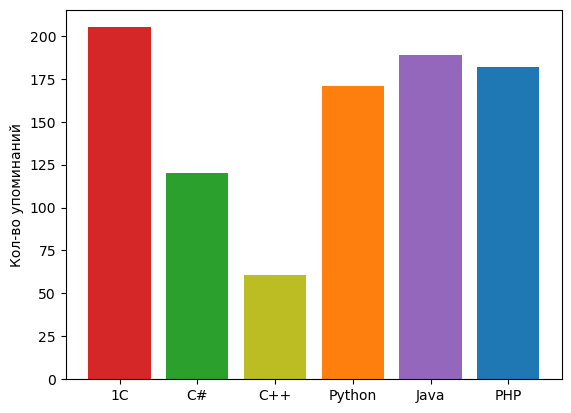

In [5]:
data = get_vacancies()
make_graphs(data)